In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo dos gráficos para ficar mais profissional
sns.set_style("whitegrid")

In [6]:
# Define o caminho do arquivo CSV
caminho_arquivo = '../data/raw/sales_data.csv'

# Carrega os dados em um DataFrame do pandas
df = pd.read_csv(caminho_arquivo)

# Mostra as 5 primeiras linhas para ter uma ideia inicial dos dados
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

# Mostra informações sobre as colunas (tipos de dados, valores nulos, etc.)
print("\nInformações sobre as colunas:")
df.info()

Primeiras 5 linhas do DataFrame:
   ID_Venda                  Data_Venda     Produto    Categoria  \
0         1  2025-01-03 14:37:18.942490  Produto_27    Decoração   
1         2  2025-07-06 14:37:18.942490  Produto_49       Roupas   
2         3  2022-12-26 14:37:18.942490   Produto_4       Roupas   
3         4  2023-12-06 14:37:18.942490  Produto_24       Roupas   
4         5  2023-07-23 14:37:18.942490  Produto_23  Eletrônicos   

   Preco_Unitario  Quantidade          Cidade  ID_Cliente  Total_Venda  
0          101.95           3  Rio de Janeiro        1934       305.85  
1          162.60           1        Salvador        1228       162.60  
2          256.90           5  Belo Horizonte        1359      1284.50  
3           65.60           6  Belo Horizonte        1384       393.60  
4          154.35           9        Salvador        1440      1389.15  

Informações sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (

In [7]:
# Converte a coluna 'Data_Venda' para o tipo datetime
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

# Extrai novas informações úteis para a análise
df['Ano'] = df['Data_Venda'].dt.year
df['Mes'] = df['Data_Venda'].dt.month
df['Dia_da_Semana'] = df['Data_Venda'].dt.day_name()

# Exibe as informações atualizadas para confirmar a mudança
print("Informações do DataFrame após a conversão de Data:")
df.info()

# Mostra as primeiras linhas com as novas colunas
print("\nDataFrame com novas colunas:")
print(df.head())

Informações do DataFrame após a conversão de Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Venda        10000 non-null  int64         
 1   Data_Venda      10000 non-null  datetime64[ns]
 2   Produto         10000 non-null  object        
 3   Categoria       10000 non-null  object        
 4   Preco_Unitario  10000 non-null  float64       
 5   Quantidade      10000 non-null  int64         
 6   Cidade          10000 non-null  object        
 7   ID_Cliente      10000 non-null  int64         
 8   Total_Venda     10000 non-null  float64       
 9   Ano             10000 non-null  int32         
 10  Mes             10000 non-null  int32         
 11  Dia_da_Semana   10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(4)
memory usage: 859.5+ KB

DataFrame com novas

Total de Vendas por Categoria:
Categoria
Decoração      2705147.72
Ferramentas    2704710.88
Alimentos      2483028.41
Eletrônicos    2462326.77
Roupas         2406208.72
Name: Total_Venda, dtype: float64


C:\Users\sandr\AppData\Local\Temp\ipykernel_1308\2080080470.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')


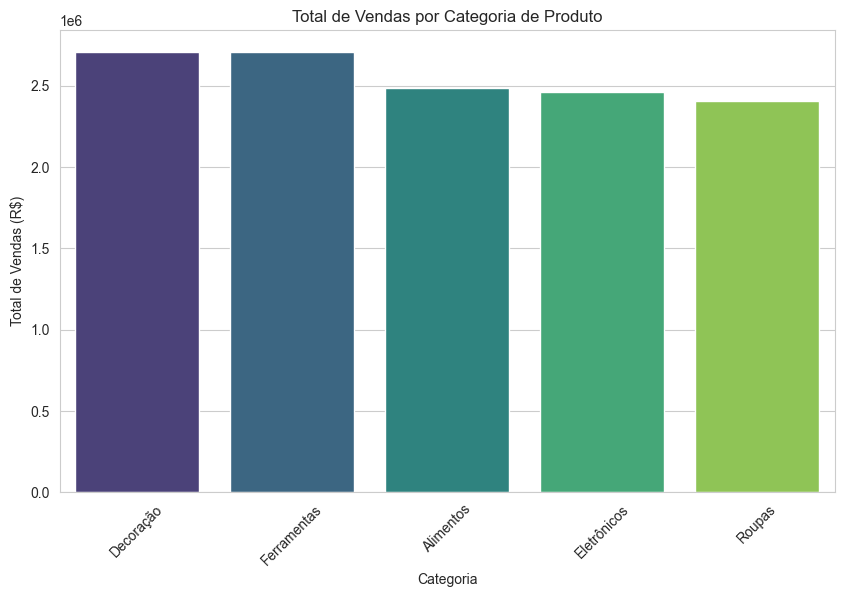

In [8]:
# Agrupa os dados por Categoria e soma o Total de Vendas
vendas_por_categoria = df.groupby('Categoria')['Total_Venda'].sum().sort_values(ascending=False)

# Exibe a tabela
print("Total de Vendas por Categoria:")
print(vendas_por_categoria)

# Cria um gráfico de barras para visualizar os dados
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.show()

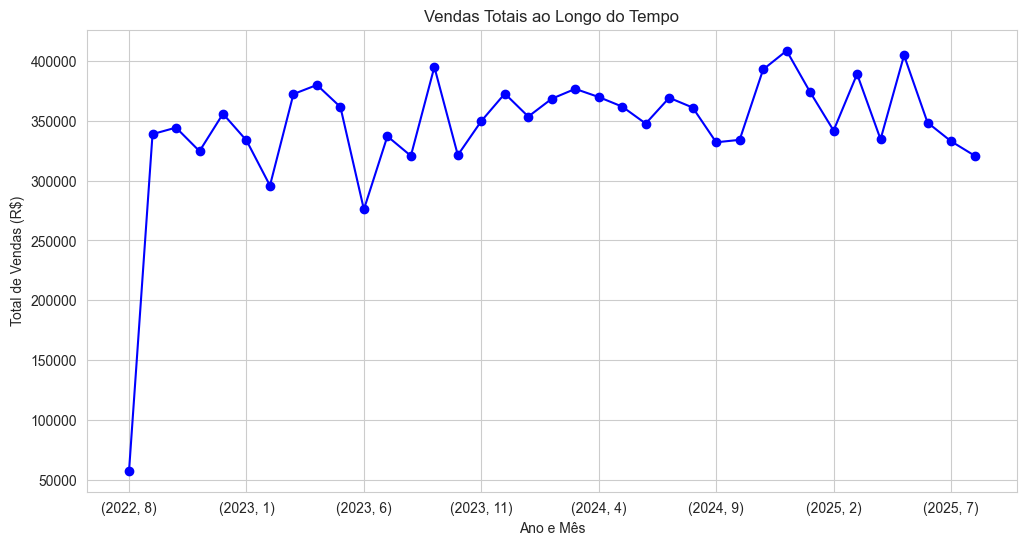

In [9]:
# Agrupa os dados por Ano e Mes e soma o Total de Vendas
vendas_mensais = df.groupby(['Ano', 'Mes'])['Total_Venda'].sum()

# Plota um gráfico de linha
plt.figure(figsize=(12, 6))
vendas_mensais.plot(kind='line', marker='o', color='b')
plt.title('Vendas Totais ao Longo do Tempo')
plt.xlabel('Ano e Mês')
plt.ylabel('Total de Vendas (R$)')
plt.grid(True)
plt.show()